In [1]:
# 二乗和誤差
y = [.1, .05, .6, .0, .05, .1, .0, .1, .0, .0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [2]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
# 「２」が一番高い確率
mean_squared_error(y=np.array(y), t=np.array(t))

0.09750000000000003

In [4]:
# 「７」が最も高い確率
y = [.1, .05, .1, .0, .05, .1, .0, .6, .0, .0]
mean_squared_error(y=np.array(y), t=np.array(t))

0.5975

In [5]:
# 交差エントロピー誤差
# 正解データのラベルに対応する出力の結果によってその値が決まる。
def cross_entropy_error(y,t):
    delta = 1e-7 # y=0 でlogがマイナス無限大に発散してしまうのを避けるため
    return -np.sum(t*np.log(y+delta))

In [6]:
cross_entropy_error(y=np.array(y), t=np.array(t))

2.302584092994546

In [7]:
# ミニバッチ学習
# 60000万枚の訓練データから100枚を無作為に選び出して、学習
import sys, os
import numpy as np
from mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)


In [8]:
# ランダムに10個抜き出す
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)
x_batch = x_train[batch_mask]
t_train = t_train[batch_mask]

[15634 16361  6488 36526 55769 38941 18058 40567 57985 33476]


In [9]:
np.random.choice(60000, 10)

array([15979, 19329, 24083, 58237, 14009, 37402, 37206, 59430, 14244,
       38223])

In [53]:
# ミニバッチ対応版 交差エントロピー誤差の実装
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

In [54]:
# 微分 微小変化h=10^(-4)程度, 中心差分
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x + h) - f(x - h)) / (2*h)

In [55]:
# f(x) = 0.01x^2 + 0.1x
def func_1(x):
    return 0.01*x**2 + 0.1*x

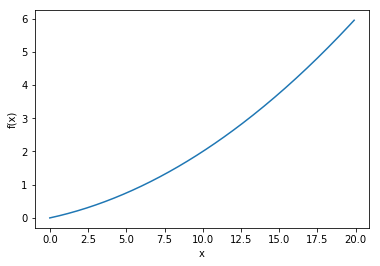

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0.0, 20.0, 0.1)
y = func_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [57]:
numerical_diff(func_1, 5)

0.1999999999990898

In [58]:
numerical_diff(func_1, 10)

0.2999999999986347

In [59]:
# 偏微分

# f(x0, x1) = x0^2 + x1^2
def func2(x):
    return np.sum(x**2)

In [60]:
# 例１
# x0の偏微分 x0=3.0の点で微分
def func2_tmp(x0): # x1 = 4.0
    return x0*x0 + 4.0**2
numerical_diff(func2_tmp, 3.0) # x0 = 3.0

6.00000000000378

In [61]:
# x1の偏微分 x1=4.0の点で微分
def func2_tmp2(x1): # x0 = 3
    return 3.0**2 + x1*x1
numerical_diff(func2_tmp2, 4.0)

7.999999999999119

In [169]:
# 勾配
# x0とx1の偏微分をまとめて計算
def numerical_gradient(f, x):
    h = 1e-4
    shape = None
    if (x.ndim != 1):
        shape = x.shape
        x = x.reshape(1, -1)
        x = x[0]
    #print(x)
    grad = np.zeros_like(x) # xと同じ形状
    #print(grad)
    # 要素それぞれに微分をする
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)の計算
        x[idx] = tmp_val + h # 微分される側の変数
        fxh1 = f(x) # もう一方の変数は固定
        
        # f(x-h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 値を元に戻す
        
    if (shape is not None):
        grad = grad.reshape(shape)
        
    return grad

In [154]:
numerical_gradient(func2, np.array([3.0, 4.0]))

[3. 4.]
[0. 0.]


array([6., 8.])

In [155]:
numerical_gradient(func2, np.array([0.0, 2.0]))

[0. 2.]
[0. 0.]


array([0., 4.])

In [156]:
numerical_gradient(func2, np.array([3.0, 0.0]))

[3. 0.]
[0. 0.]


array([6., 0.])

In [157]:
# 勾配降下法
def gradient_decsent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [158]:
init_x = np.array([-3.0, 4.0])
gradient_decsent(func2, init_x=init_x, lr=0.1, step_num=100)

[-3.  4.]
[0. 0.]
[-2.4  3.2]
[0. 0.]
[-1.92  2.56]
[0. 0.]
[-1.536  2.048]
[0. 0.]
[-1.2288  1.6384]
[0. 0.]
[-0.98304  1.31072]
[0. 0.]
[-0.786432  1.048576]
[0. 0.]
[-0.6291456  0.8388608]
[0. 0.]
[-0.50331648  0.67108864]
[0. 0.]
[-0.40265318  0.53687091]
[0. 0.]
[-0.32212255  0.42949673]
[0. 0.]
[-0.25769804  0.34359738]
[0. 0.]
[-0.20615843  0.27487791]
[0. 0.]
[-0.16492674  0.21990233]
[0. 0.]
[-0.1319414   0.17592186]
[0. 0.]
[-0.10555312  0.14073749]
[0. 0.]
[-0.08444249  0.11258999]
[0. 0.]
[-0.06755399  0.09007199]
[0. 0.]
[-0.0540432   0.07205759]
[0. 0.]
[-0.04323456  0.05764608]
[0. 0.]
[-0.03458765  0.04611686]
[0. 0.]
[-0.02767012  0.03689349]
[0. 0.]
[-0.02213609  0.02951479]
[0. 0.]
[-0.01770887  0.02361183]
[0. 0.]
[-0.0141671   0.01888947]
[0. 0.]
[-0.01133368  0.01511157]
[0. 0.]
[-0.00906694  0.01208926]
[0. 0.]
[-0.00725355  0.00967141]
[0. 0.]
[-0.00580284  0.00773713]
[0. 0.]
[-0.00464228  0.0061897 ]
[0. 0.]
[-0.00371382  0.00495176]
[0. 0.]
[-0.00297106  0.00

array([-6.11110793e-10,  8.14814391e-10])

In [159]:
# 学習率が大きすぎる場合
gradient_decsent(func2, init_x=init_x, lr=10.0, step_num=100)

[-6.11110793e-10  8.14814391e-10]
[0. 0.]
[ 1.16111051e-08 -1.54814734e-08]
[0. 0.]
[-2.20610996e-07  2.94147995e-07]
[0. 0.]
[ 4.19160893e-06 -5.58881190e-06]
[0. 0.]
[-7.96405696e-05  1.06187426e-04]
[0. 0.]
[ 0.00151317 -0.00201756]
[0. 0.]
[-0.02875025  0.03833366]
[0. 0.]
[ 0.54625467 -0.72833956]
[0. 0.]
[-10.37883868  13.83845157]
[0. 0.]
[ 197.19793485 -262.9305798 ]
[0. 0.]
[-3746.7607625   4995.68101424]
[0. 0.]
[ 71188.4549491  -94917.93956203]
[0. 0.]
[-1352580.73297815  1803440.78693944]
[0. 0.]
[ 25699030.59514685 -34265406.86931056]
[0. 0.]
[-4.88288469e+08  6.51034593e+08]
[0. 0.]
[ 9.27811153e+09 -1.23665654e+10]
[0. 0.]
[-1.74222688e+11  2.33393435e+11]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -

array([ 2.34235971e+12, -3.96091057e+12])

In [160]:
# 学習率が小さすぎる場合
gradient_decsent(func2, init_x=init_x, lr=1e-10, step_num=100)

[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]
[0. 0.]
[ 2.34235971e+12 -3.96091057e+12]


array([ 2.34235971e+12, -3.96091057e+12])

In [161]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [178]:
# シグモイド関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [162]:
# 簡単なNNで勾配降下法をテスト
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # ガウス分布で初期化[2,3]
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [163]:
net = simpleNet()
print(net.W)

[[ 0.76483156 -0.68439746 -1.19526545]
 [-0.08900573 -1.37364867 -0.28628932]]


In [164]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.37879378 -1.64692228 -0.97481965]


In [165]:
np.argmax(p)

0

In [166]:
t = np.array([0, 0, 1])
print(net.loss(x, t))

3.0140687745036465


In [167]:
def f(W):
    return net.loss(x, t)

In [171]:
dW = numerical_gradient(f, net.W)
dW

array([[ 0.09477348, -0.4292202 ,  0.33444673],
       [ 0.14216021, -0.64383031,  0.50167009]])

In [172]:
np.array([1, 2, 3])

array([1, 2, 3])

In [173]:
a = np.array([[1,2,3], [4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [174]:
a = a.reshape(1, -1)
a

array([[1, 2, 3, 4, 5, 6]])

In [175]:
a[0]

array([1, 2, 3, 4, 5, 6])

In [176]:
a[0].reshape(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

In [197]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

In [198]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [199]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

In [216]:
# 2層（隠れ層1個）のNN
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    
    # x:入力, t:教師
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1) # 各サンプルで列方向に向かって、最大の確率を与えるインデックスを求める
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # x:入力, t:教師
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    
    # 高速バージョン こっちを使おう
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)
        return grads

In [207]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [209]:
# ミニバッチ学習の実装 TwoLayerNet内部には未実装
import numpy as np
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# ハイパーパラメータ
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# SGD 確率的勾配降下法
for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 学習過程の記録
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    print("#%s loss: %s" % (i, loss))

#0 loss: 2.2751044282012027
#1 loss: 2.299357035942647
#2 loss: 2.2961315977106973
#3 loss: 2.295998833582281
#4 loss: 2.2820281972095104
#5 loss: 2.3046945084577444
#6 loss: 2.2948767931215586
#7 loss: 2.2849354271195295
#8 loss: 2.2874353023202136
#9 loss: 2.299479193641109
#10 loss: 2.2899449407693626
#11 loss: 2.2998518760507785
#12 loss: 2.2763298103260596
#13 loss: 2.283007677509846
#14 loss: 2.2958683189283353
#15 loss: 2.29088507946328
#16 loss: 2.2913603431065273
#17 loss: 2.281814292600318
#18 loss: 2.2865429679638885
#19 loss: 2.292567208054483
#20 loss: 2.2751315182324263
#21 loss: 2.2877531691057977
#22 loss: 2.2844496248602617
#23 loss: 2.2990735405847578
#24 loss: 2.3017163727493726
#25 loss: 2.2973491537619197
#26 loss: 2.295300538827639
#27 loss: 2.300576742141748
#28 loss: 2.292507893678041
#29 loss: 2.2924262222794565
#30 loss: 2.290790666331012
#31 loss: 2.2913917613583408
#32 loss: 2.29304378987421
#33 loss: 2.2989469226278474
#34 loss: 2.2824032738872604
#35 loss:

#365 loss: 1.3886656871060346
#366 loss: 1.4440409927631936
#367 loss: 1.4477642639795782
#368 loss: 1.4098013530571873
#369 loss: 1.372710441986444
#370 loss: 1.4457833990416953
#371 loss: 1.4073685164553853
#372 loss: 1.3409934745318217
#373 loss: 1.33178190108947
#374 loss: 1.3435271213335696
#375 loss: 1.403066617768867
#376 loss: 1.39994343960592
#377 loss: 1.361022683887026
#378 loss: 1.3555426054303532
#379 loss: 1.4284983750804294
#380 loss: 1.3550645794701066
#381 loss: 1.3231285612271413
#382 loss: 1.3825062315131336
#383 loss: 1.3822955739503067
#384 loss: 1.3200379223799743
#385 loss: 1.3118251548087536
#386 loss: 1.338099456671552
#387 loss: 1.3246201073396917
#388 loss: 1.325794288752876
#389 loss: 1.3219079807035894
#390 loss: 1.337799453415561
#391 loss: 1.229446501682465
#392 loss: 1.308803759647166
#393 loss: 1.2242099858824842
#394 loss: 1.209832497388894
#395 loss: 1.1626045083998346
#396 loss: 1.3311595772412679
#397 loss: 1.3089872294465683
#398 loss: 1.2171381104

#669 loss: 0.7142707883501346
#670 loss: 0.7257658582166282
#671 loss: 0.7737181930866494
#672 loss: 0.8593297499219368
#673 loss: 0.8454662884895585
#674 loss: 0.8364592694201974
#675 loss: 0.6437874518567385
#676 loss: 0.7540779105281459
#677 loss: 0.8278194308196862
#678 loss: 0.7789048017612024
#679 loss: 0.8047031492612092
#680 loss: 0.6371384830483252
#681 loss: 0.7031015246715789
#682 loss: 0.6626402194424305
#683 loss: 0.778081182988815
#684 loss: 0.6619291410269977
#685 loss: 0.7713221583068135
#686 loss: 0.7743568735530392
#687 loss: 0.8300247006573703
#688 loss: 0.6394277976695937
#689 loss: 0.8576560644361824
#690 loss: 0.701356047896549
#691 loss: 0.7247169461694284
#692 loss: 0.6496525874713555
#693 loss: 0.7185230359441924
#694 loss: 0.6975624978797532
#695 loss: 0.650246311455183
#696 loss: 0.7125763616437304
#697 loss: 0.7853313425534363
#698 loss: 0.7432543922269171
#699 loss: 0.8016313004060939
#700 loss: 0.693438985401005
#701 loss: 0.7359435168292098
#702 loss: 0.8

#944 loss: 0.6415548824159463
#945 loss: 0.6219074145577972
#946 loss: 0.5769862372901075
#947 loss: 0.5024852062107604
#948 loss: 0.4618441479661577
#949 loss: 0.47951109758065175
#950 loss: 0.5257192835101986
#951 loss: 0.5012254439769737
#952 loss: 0.5079510334325108
#953 loss: 0.5310704283708462
#954 loss: 0.6569766913765536
#955 loss: 0.539781919097676
#956 loss: 0.5103483887294551
#957 loss: 0.6015501250958308
#958 loss: 0.47508810293036396
#959 loss: 0.5592765224923457
#960 loss: 0.5438591976106033
#961 loss: 0.6182693802612007
#962 loss: 0.5008274128086785
#963 loss: 0.4868545802422738
#964 loss: 0.5788361596680924
#965 loss: 0.4826325370603233
#966 loss: 0.52990032392272
#967 loss: 0.47854788666751785
#968 loss: 0.6237475477392364
#969 loss: 0.475302070462213
#970 loss: 0.5685202006015293
#971 loss: 0.5568143444048214
#972 loss: 0.40890123455319327
#973 loss: 0.6426626378886463
#974 loss: 0.5015065797136173
#975 loss: 0.3821994286551728
#976 loss: 0.5803446667931038
#977 loss:

#1219 loss: 0.3765263982541277
#1220 loss: 0.6217240884029348
#1221 loss: 0.5215754638581259
#1222 loss: 0.48016194785976213
#1223 loss: 0.4621736763504862
#1224 loss: 0.4177047676381872
#1225 loss: 0.45267147793575496
#1226 loss: 0.6221439771392231
#1227 loss: 0.3826688461952628
#1228 loss: 0.412009763123972
#1229 loss: 0.39288013843047737
#1230 loss: 0.5356998704902723
#1231 loss: 0.4068695417624432
#1232 loss: 0.4346573906794549
#1233 loss: 0.43738816282709786
#1234 loss: 0.36129523486526877
#1235 loss: 0.5331024053495926
#1236 loss: 0.5332184048737253
#1237 loss: 0.3450718580252179
#1238 loss: 0.486329827320913
#1239 loss: 0.39412459885230533
#1240 loss: 0.5826340349394377
#1241 loss: 0.40149983521613875
#1242 loss: 0.4062755197927644
#1243 loss: 0.3985180310548535
#1244 loss: 0.44889274846624727
#1245 loss: 0.4625991129501789
#1246 loss: 0.4040398041083618
#1247 loss: 0.6131574171611561
#1248 loss: 0.47782456530396367
#1249 loss: 0.5656463974735073
#1250 loss: 0.5177485191110887
#

#1521 loss: 0.47410786643531333
#1522 loss: 0.5136121569816574
#1523 loss: 0.5270527054065496
#1524 loss: 0.35765758280384935
#1525 loss: 0.382713553795423
#1526 loss: 0.41288484595736336
#1527 loss: 0.4964350753974366
#1528 loss: 0.36325554438476887
#1529 loss: 0.41339287176025796
#1530 loss: 0.3213869610914316
#1531 loss: 0.40835520129145814
#1532 loss: 0.3572827936158429
#1533 loss: 0.5275623597025784
#1534 loss: 0.4974205475158886
#1535 loss: 0.46449188203077485
#1536 loss: 0.45275810421679885
#1537 loss: 0.3633423816697939
#1538 loss: 0.3573321666283524
#1539 loss: 0.4009369552351911
#1540 loss: 0.5094227420961347
#1541 loss: 0.4061433887604525
#1542 loss: 0.457796772229655
#1543 loss: 0.3884089593531313
#1544 loss: 0.3427051815728433
#1545 loss: 0.2865405055829811
#1546 loss: 0.4102724288159289
#1547 loss: 0.3829619557462678
#1548 loss: 0.4569701095166871
#1549 loss: 0.4688684110068555
#1550 loss: 0.4832774812495712
#1551 loss: 0.5225754576004218
#1552 loss: 0.3516602579099651
#1

#1900 loss: 0.3787755151825049
#1901 loss: 0.26679338609171094
#1902 loss: 0.34647587438021693
#1903 loss: 0.36029128236108504
#1904 loss: 0.2968631359957208
#1905 loss: 0.5233216901517891
#1906 loss: 0.31540303971384054
#1907 loss: 0.33502018888580637
#1908 loss: 0.357746055898548
#1909 loss: 0.3823728436120883
#1910 loss: 0.3401318378434998
#1911 loss: 0.3205257678768676
#1912 loss: 0.3457798644993797
#1913 loss: 0.4228995082266238
#1914 loss: 0.35068326411563794
#1915 loss: 0.21021592700736164
#1916 loss: 0.31123894296660537
#1917 loss: 0.19009085013577567
#1918 loss: 0.37851649851738356
#1919 loss: 0.3935575761136982
#1920 loss: 0.3313319887903113
#1921 loss: 0.24828919151358037
#1922 loss: 0.35873993423644085
#1923 loss: 0.3990454008006445
#1924 loss: 0.3293312000229385
#1925 loss: 0.4288963897817562
#1926 loss: 0.3948065288611927
#1927 loss: 0.39641965360454534
#1928 loss: 0.30134942130157055
#1929 loss: 0.3507495004913686
#1930 loss: 0.4155163420483956
#1931 loss: 0.405340299780

#2163 loss: 0.39398317098774355
#2164 loss: 0.3688096158133515
#2165 loss: 0.3209291549202915
#2166 loss: 0.33760854804758245
#2167 loss: 0.33711804890345987
#2168 loss: 0.34835421168118885
#2169 loss: 0.26395790002668224
#2170 loss: 0.3553004922706615
#2171 loss: 0.40496933978913086
#2172 loss: 0.467356926124703
#2173 loss: 0.3136452655388601
#2174 loss: 0.3150025122487918
#2175 loss: 0.23571792001684064
#2176 loss: 0.35179890105030753
#2177 loss: 0.49762670752803273
#2178 loss: 0.4629086185924463
#2179 loss: 0.42271875906415424
#2180 loss: 0.41041929149581624
#2181 loss: 0.3304354854614449
#2182 loss: 0.30996537658847445
#2183 loss: 0.4758117075929325
#2184 loss: 0.3023573437889528
#2185 loss: 0.4781010169933902
#2186 loss: 0.2583543912501836
#2187 loss: 0.3699205082900705
#2188 loss: 0.31032727788361164
#2189 loss: 0.31971135031559916
#2190 loss: 0.1617546328446987
#2191 loss: 0.32804154611977365
#2192 loss: 0.29721301182144433
#2193 loss: 0.4320378124285763
#2194 loss: 0.3094415528

#2504 loss: 0.17911822412559442
#2505 loss: 0.39039767445769813
#2506 loss: 0.286704059063117
#2507 loss: 0.3519278216412036
#2508 loss: 0.3315046675873333
#2509 loss: 0.5225934881961619
#2510 loss: 0.1922232854086818
#2511 loss: 0.23839796181362033
#2512 loss: 0.2274107103804334
#2513 loss: 0.42445749535858723
#2514 loss: 0.337307602727583
#2515 loss: 0.3269764797935475
#2516 loss: 0.2998414345014551
#2517 loss: 0.27894696537806085
#2518 loss: 0.3731346650802047
#2519 loss: 0.3367730331553795
#2520 loss: 0.38165525420327917
#2521 loss: 0.21611217859097195
#2522 loss: 0.4195496921203727
#2523 loss: 0.2055313601053626
#2524 loss: 0.32103085990219654
#2525 loss: 0.3384362656121525
#2526 loss: 0.3668274541593962
#2527 loss: 0.28009167551408837
#2528 loss: 0.2873272801235724
#2529 loss: 0.3026609343312118
#2530 loss: 0.16585519190602102
#2531 loss: 0.22800084933708065
#2532 loss: 0.14025001622058228
#2533 loss: 0.4268447569170086
#2534 loss: 0.3706399952583224
#2535 loss: 0.334777814244305

#2772 loss: 0.26146569996083274
#2773 loss: 0.4150807979390266
#2774 loss: 0.3088733201564886
#2775 loss: 0.36556831499915093
#2776 loss: 0.33710344904641815
#2777 loss: 0.30022300018513465
#2778 loss: 0.33621052913854554
#2779 loss: 0.3723649557625924
#2780 loss: 0.25253466979123185
#2781 loss: 0.3487257422935673
#2782 loss: 0.29435762395603093
#2783 loss: 0.324234500738811
#2784 loss: 0.2883642345022508
#2785 loss: 0.30466717262784754
#2786 loss: 0.35379009620989793
#2787 loss: 0.35205683696727486
#2788 loss: 0.3696667540359379
#2789 loss: 0.27576564576525087
#2790 loss: 0.215518773013085
#2791 loss: 0.3526064650746402
#2792 loss: 0.1963511922609959
#2793 loss: 0.37675532864553896
#2794 loss: 0.24381575124230853
#2795 loss: 0.1911055468910421
#2796 loss: 0.2383303647004976
#2797 loss: 0.18236177458028177
#2798 loss: 0.22315962238851522
#2799 loss: 0.4174938744099583
#2800 loss: 0.3423079697892188
#2801 loss: 0.2941224246594911
#2802 loss: 0.31814359713739615
#2803 loss: 0.36581769742

#3051 loss: 0.3921805346354702
#3052 loss: 0.21895293258399998
#3053 loss: 0.4573617016335848
#3054 loss: 0.18871552103266243
#3055 loss: 0.2197023686080095
#3056 loss: 0.28835663505516446
#3057 loss: 0.47052337847236997
#3058 loss: 0.2019699831779878
#3059 loss: 0.3571674060872795
#3060 loss: 0.25324688300964493
#3061 loss: 0.23071952710404262
#3062 loss: 0.3864336525725385
#3063 loss: 0.2629535555958045
#3064 loss: 0.24448101140628073
#3065 loss: 0.17763519457472243
#3066 loss: 0.2631737529465495
#3067 loss: 0.3048154460066924
#3068 loss: 0.3490287721455965
#3069 loss: 0.25654892016562597
#3070 loss: 0.2872144543398418
#3071 loss: 0.32366862464502977
#3072 loss: 0.3028892056670632
#3073 loss: 0.41936427825390643
#3074 loss: 0.19389306567922207
#3075 loss: 0.1977918536912119
#3076 loss: 0.3036328889630618
#3077 loss: 0.35424808517243783
#3078 loss: 0.35822018865721494
#3079 loss: 0.25776157900767505
#3080 loss: 0.309618065486855
#3081 loss: 0.27939665190541985
#3082 loss: 0.2160872306

#3339 loss: 0.18976219856959073
#3340 loss: 0.29369913248018703
#3341 loss: 0.1922660685536904
#3342 loss: 0.29671814490321036
#3343 loss: 0.3082413089079116
#3344 loss: 0.3646959034093726
#3345 loss: 0.25877813255077714
#3346 loss: 0.398518685512291
#3347 loss: 0.29706667158618383
#3348 loss: 0.3764416246250225
#3349 loss: 0.3076507299411507
#3350 loss: 0.24893816112964487
#3351 loss: 0.167972929831298
#3352 loss: 0.28470007755780913
#3353 loss: 0.20680059667138362
#3354 loss: 0.33080048412075785
#3355 loss: 0.25672859024549316
#3356 loss: 0.2316199619769892
#3357 loss: 0.1515592901411029
#3358 loss: 0.2823445262289405
#3359 loss: 0.3312010924854862
#3360 loss: 0.20032457810950696
#3361 loss: 0.19826195681298345
#3362 loss: 0.1950775766736195
#3363 loss: 0.2339805643963718
#3364 loss: 0.2689854433872352
#3365 loss: 0.2485718136482159
#3366 loss: 0.2080175750448004
#3367 loss: 0.22382533315115263
#3368 loss: 0.2994289986382342
#3369 loss: 0.2539846793526302
#3370 loss: 0.13662614418886

#3630 loss: 0.3005106114049712
#3631 loss: 0.2916619454260425
#3632 loss: 0.3183290121341217
#3633 loss: 0.33205524312517753
#3634 loss: 0.2742511405080517
#3635 loss: 0.20004212850778888
#3636 loss: 0.17198495899526572
#3637 loss: 0.261818288636333
#3638 loss: 0.1512094007997396
#3639 loss: 0.26137321190335
#3640 loss: 0.28797330339333166
#3641 loss: 0.43597487496694404
#3642 loss: 0.1813974251570582
#3643 loss: 0.35845309810793274
#3644 loss: 0.2771065586045474
#3645 loss: 0.28384980900756074
#3646 loss: 0.14427894982583223
#3647 loss: 0.30424190308457677
#3648 loss: 0.14776560122824237
#3649 loss: 0.28726191911866017
#3650 loss: 0.28899645971706467
#3651 loss: 0.3385275543864531
#3652 loss: 0.2945932312715584
#3653 loss: 0.23445814993667743
#3654 loss: 0.2927103538213086
#3655 loss: 0.16948026065027819
#3656 loss: 0.36154263686350113
#3657 loss: 0.25410949789903575
#3658 loss: 0.1728694810088035
#3659 loss: 0.27853563336099596
#3660 loss: 0.26580271965185803
#3661 loss: 0.3236313614

#3933 loss: 0.3981691766297068
#3934 loss: 0.22634204336197652
#3935 loss: 0.2614200748979488
#3936 loss: 0.21268376925077065
#3937 loss: 0.23524692064836994
#3938 loss: 0.20354659651568774
#3939 loss: 0.2888854438596873
#3940 loss: 0.3159795124173538
#3941 loss: 0.22322975490154634
#3942 loss: 0.19526018098473544
#3943 loss: 0.1568154141824537
#3944 loss: 0.21377917603188956
#3945 loss: 0.3710171178223072
#3946 loss: 0.20170857932430963
#3947 loss: 0.1942596104314679
#3948 loss: 0.311143582473162
#3949 loss: 0.366552613518353
#3950 loss: 0.19046215653522844
#3951 loss: 0.36553290910926023
#3952 loss: 0.16234781281969823
#3953 loss: 0.2882544775606041
#3954 loss: 0.20500593626294847
#3955 loss: 0.24599402121812608
#3956 loss: 0.19173076701121847
#3957 loss: 0.280016397770671
#3958 loss: 0.18872952088870587
#3959 loss: 0.22419559303368009
#3960 loss: 0.2854972202636669
#3961 loss: 0.2833618531423407
#3962 loss: 0.22043219374585718
#3963 loss: 0.3069176304641166
#3964 loss: 0.24741318345

#4206 loss: 0.2850133107066389
#4207 loss: 0.23526126491552202
#4208 loss: 0.2827228835766934
#4209 loss: 0.2901087929210314
#4210 loss: 0.32304023506388446
#4211 loss: 0.22419911135707324
#4212 loss: 0.38702347038514795
#4213 loss: 0.3729042054537888
#4214 loss: 0.19766687232477229
#4215 loss: 0.29556470005686686
#4216 loss: 0.09632836358103063
#4217 loss: 0.39063174996523176
#4218 loss: 0.18827195980226805
#4219 loss: 0.2814210214096422
#4220 loss: 0.23509302822164904
#4221 loss: 0.195718009696304
#4222 loss: 0.1153684366603805
#4223 loss: 0.1677229757198748
#4224 loss: 0.28434092287364404
#4225 loss: 0.3869857087824664
#4226 loss: 0.2739824326512414
#4227 loss: 0.27338384117736864
#4228 loss: 0.20329997319679197
#4229 loss: 0.32609787053025807
#4230 loss: 0.20155082866764776
#4231 loss: 0.2474522723589089
#4232 loss: 0.2611820165719764
#4233 loss: 0.20352038802419764
#4234 loss: 0.18113802129467657
#4235 loss: 0.19904938911905354
#4236 loss: 0.27950721108755283
#4237 loss: 0.1435451

#4495 loss: 0.17808273479414655
#4496 loss: 0.2848406224176868
#4497 loss: 0.21639866073981548
#4498 loss: 0.26370482625157515
#4499 loss: 0.23115034386009772
#4500 loss: 0.1788269502824048
#4501 loss: 0.19420032025968278
#4502 loss: 0.2861213054764452
#4503 loss: 0.2580233980284735
#4504 loss: 0.18796926783067744
#4505 loss: 0.320496789083909
#4506 loss: 0.2238088183711716
#4507 loss: 0.19724879025840758
#4508 loss: 0.23454820385784317
#4509 loss: 0.1873497437259804
#4510 loss: 0.3402131374425669
#4511 loss: 0.2643718297078297
#4512 loss: 0.3877253192197928
#4513 loss: 0.19955779443852997
#4514 loss: 0.23233046228624338
#4515 loss: 0.24805783959924976
#4516 loss: 0.2946572132383995
#4517 loss: 0.3146935663573093
#4518 loss: 0.1693594339396654
#4519 loss: 0.3760647620185082
#4520 loss: 0.2635652857469861
#4521 loss: 0.178937287700648
#4522 loss: 0.3531228593884967
#4523 loss: 0.2174907179870807
#4524 loss: 0.1854642896230949
#4525 loss: 0.35501107756775285
#4526 loss: 0.140963527589472

#4785 loss: 0.1454436449682616
#4786 loss: 0.23142672600384032
#4787 loss: 0.2463512235972421
#4788 loss: 0.16670400591600598
#4789 loss: 0.24670650170878197
#4790 loss: 0.2203811990111334
#4791 loss: 0.10155895628744632
#4792 loss: 0.27191864263935694
#4793 loss: 0.27403742245132134
#4794 loss: 0.26207750260999846
#4795 loss: 0.2524831660823895
#4796 loss: 0.27990040888255063
#4797 loss: 0.1921144540244307
#4798 loss: 0.10792774572375446
#4799 loss: 0.2554870567645759
#4800 loss: 0.22270658419275471
#4801 loss: 0.16966077276830258
#4802 loss: 0.3064309328857488
#4803 loss: 0.15527323195795767
#4804 loss: 0.19606194672972546
#4805 loss: 0.294971657769903
#4806 loss: 0.25078954695881156
#4807 loss: 0.2263372539453341
#4808 loss: 0.2689395146196451
#4809 loss: 0.3060844201920206
#4810 loss: 0.20122653030453763
#4811 loss: 0.3794361946610868
#4812 loss: 0.2101921410514235
#4813 loss: 0.22960624415754183
#4814 loss: 0.2510070819454053
#4815 loss: 0.24796700976035846
#4816 loss: 0.178016926

#5078 loss: 0.3162627992608785
#5079 loss: 0.24138859354889802
#5080 loss: 0.28721481189366593
#5081 loss: 0.21683254533823765
#5082 loss: 0.20725290336856017
#5083 loss: 0.20805429576656803
#5084 loss: 0.18370877651761983
#5085 loss: 0.23907529941016045
#5086 loss: 0.15100002441076754
#5087 loss: 0.12771097413719307
#5088 loss: 0.3039111678283168
#5089 loss: 0.31994357373797155
#5090 loss: 0.3228586594665918
#5091 loss: 0.26821549526276356
#5092 loss: 0.1508100589899664
#5093 loss: 0.31083402418490014
#5094 loss: 0.23285605696825687
#5095 loss: 0.21468488963189616
#5096 loss: 0.28781215914005726
#5097 loss: 0.22674222009340778
#5098 loss: 0.275684006182424
#5099 loss: 0.11070401214438777
#5100 loss: 0.12607034947690215
#5101 loss: 0.1993867932463297
#5102 loss: 0.12450470088828858
#5103 loss: 0.3119559842048949
#5104 loss: 0.2399722905638701
#5105 loss: 0.20469726568919025
#5106 loss: 0.22813272250334102
#5107 loss: 0.38296053573344757
#5108 loss: 0.3114023124711976
#5109 loss: 0.2482

#5350 loss: 0.14779755516075782
#5351 loss: 0.19723696864302556
#5352 loss: 0.1853945108054735
#5353 loss: 0.23647125624194737
#5354 loss: 0.2065303136541883
#5355 loss: 0.21647865722795326
#5356 loss: 0.1747333172892488
#5357 loss: 0.21645168703123605
#5358 loss: 0.2274565410692082
#5359 loss: 0.20178837848017314
#5360 loss: 0.183739400265966
#5361 loss: 0.20747260352356559
#5362 loss: 0.25116526921041016
#5363 loss: 0.22576855483556574
#5364 loss: 0.18674566514174246
#5365 loss: 0.24148796822491525
#5366 loss: 0.3205792888603387
#5367 loss: 0.24010648463201328
#5368 loss: 0.1428003605652263
#5369 loss: 0.18018819993159582
#5370 loss: 0.3381665952782616
#5371 loss: 0.29030352227704187
#5372 loss: 0.405324901215451
#5373 loss: 0.18469107491714432
#5374 loss: 0.25884620958009763
#5375 loss: 0.2249513398915638
#5376 loss: 0.18532084171423624
#5377 loss: 0.11899317885464272
#5378 loss: 0.33686708919494335
#5379 loss: 0.20215184143250442
#5380 loss: 0.22486600453292016
#5381 loss: 0.338093

#5612 loss: 0.31018554049715474
#5613 loss: 0.16337415298063795
#5614 loss: 0.1471718484620602
#5615 loss: 0.1923953823400784
#5616 loss: 0.22193091162065812
#5617 loss: 0.3317409162314447
#5618 loss: 0.34308421476155077
#5619 loss: 0.33893559881383356
#5620 loss: 0.16019517419270937
#5621 loss: 0.16314923291711414
#5622 loss: 0.18098322092296398
#5623 loss: 0.2139351630191241
#5624 loss: 0.2624180903620961
#5625 loss: 0.23238789626341164
#5626 loss: 0.4237658294040644
#5627 loss: 0.11893988173506756
#5628 loss: 0.28661103971111995
#5629 loss: 0.2725058006329241
#5630 loss: 0.21457270660111472
#5631 loss: 0.2415359903623732
#5632 loss: 0.17298960530421215
#5633 loss: 0.18171226651347996
#5634 loss: 0.1227035709855176
#5635 loss: 0.28718048002558405
#5636 loss: 0.2111101181166515
#5637 loss: 0.2832341170187942
#5638 loss: 0.2673684226688409
#5639 loss: 0.15368521542197175
#5640 loss: 0.16367813412813945
#5641 loss: 0.16052770630894783
#5642 loss: 0.2243555191978519
#5643 loss: 0.2017816

#5888 loss: 0.10735586284491229
#5889 loss: 0.22009760193017172
#5890 loss: 0.23525227919661856
#5891 loss: 0.21999160339983867
#5892 loss: 0.24289354452274936
#5893 loss: 0.19945906873619434
#5894 loss: 0.18979729394349004
#5895 loss: 0.10501969053033226
#5896 loss: 0.224483585931467
#5897 loss: 0.2095692741505544
#5898 loss: 0.1961809205183331
#5899 loss: 0.21023454076030565
#5900 loss: 0.25496500606540085
#5901 loss: 0.2541665604428245
#5902 loss: 0.24938405922446058
#5903 loss: 0.11573233915947742
#5904 loss: 0.17761453299405516
#5905 loss: 0.10271673601894435
#5906 loss: 0.1683305220560064
#5907 loss: 0.20909999536311222
#5908 loss: 0.26125038238363274
#5909 loss: 0.201289515870281
#5910 loss: 0.15849346469591802
#5911 loss: 0.22325352887082442
#5912 loss: 0.197181209912935
#5913 loss: 0.283307224342908
#5914 loss: 0.20766601636527227
#5915 loss: 0.25303603765839683
#5916 loss: 0.20149797463109728
#5917 loss: 0.1536648967472734
#5918 loss: 0.17689849226580148
#5919 loss: 0.2393660

#6160 loss: 0.28977118128120544
#6161 loss: 0.3124216832470424
#6162 loss: 0.3001407378244661
#6163 loss: 0.2668687886250485
#6164 loss: 0.1439483585316835
#6165 loss: 0.2456193236470801
#6166 loss: 0.1783504457250046
#6167 loss: 0.12457953637142795
#6168 loss: 0.1579628879427222
#6169 loss: 0.2437505700694903
#6170 loss: 0.2506363314085958
#6171 loss: 0.1687421853706139
#6172 loss: 0.22754349281279776
#6173 loss: 0.20218539939789332
#6174 loss: 0.22682340491491346
#6175 loss: 0.2557437425590298
#6176 loss: 0.16583264268850345
#6177 loss: 0.30418524761654264
#6178 loss: 0.08288209037402403
#6179 loss: 0.12828260551840148
#6180 loss: 0.2921599129138594
#6181 loss: 0.11797834866928779
#6182 loss: 0.34066126240966726
#6183 loss: 0.15212856008714704
#6184 loss: 0.14601325456584807
#6185 loss: 0.20226061779854013
#6186 loss: 0.30637274739778014
#6187 loss: 0.16086696095612651
#6188 loss: 0.17934935025738774
#6189 loss: 0.32121106823436557
#6190 loss: 0.16204213757293648
#6191 loss: 0.298107

#6422 loss: 0.21589167876582477
#6423 loss: 0.25300005297499384
#6424 loss: 0.10736619371742658
#6425 loss: 0.24278352376710452
#6426 loss: 0.2944627741567693
#6427 loss: 0.24565757084311649
#6428 loss: 0.2826985025193692
#6429 loss: 0.24626656806904396
#6430 loss: 0.1332219969295645
#6431 loss: 0.2706603478291502
#6432 loss: 0.24400227387376977
#6433 loss: 0.13408634077119796
#6434 loss: 0.25014919335762914
#6435 loss: 0.23771830728240956
#6436 loss: 0.1757637717381911
#6437 loss: 0.2424255023275242
#6438 loss: 0.11803724478609076
#6439 loss: 0.19655368689871522
#6440 loss: 0.14905984994065097
#6441 loss: 0.33383530983114085
#6442 loss: 0.1586020954550672
#6443 loss: 0.18220147371412768
#6444 loss: 0.16838314617029337
#6445 loss: 0.2087934422147903
#6446 loss: 0.2085683353475644
#6447 loss: 0.15029375810426104
#6448 loss: 0.20927621751099132
#6449 loss: 0.2376499529903785
#6450 loss: 0.23856507616592848
#6451 loss: 0.1144951061278217
#6452 loss: 0.18548847759221787
#6453 loss: 0.21035

#6737 loss: 0.24388853709935598
#6738 loss: 0.29378086178541424
#6739 loss: 0.1380319398600065
#6740 loss: 0.22886606156508407
#6741 loss: 0.22807649183791465
#6742 loss: 0.21688595680569808
#6743 loss: 0.10035138344421402
#6744 loss: 0.12968902638129282
#6745 loss: 0.11055345760636913
#6746 loss: 0.1296407932662177
#6747 loss: 0.15924185061914797
#6748 loss: 0.1340280452652104
#6749 loss: 0.40823952908224065
#6750 loss: 0.21607397866613692
#6751 loss: 0.24125746008595847
#6752 loss: 0.13964534468814105
#6753 loss: 0.13840234023108597
#6754 loss: 0.12118556073664326
#6755 loss: 0.15998276403439
#6756 loss: 0.18591211443107356
#6757 loss: 0.1879537913896548
#6758 loss: 0.3127503281957441
#6759 loss: 0.20238159460392102
#6760 loss: 0.17839556683707747
#6761 loss: 0.2409680620177169
#6762 loss: 0.1226128492237792
#6763 loss: 0.24509316962939717
#6764 loss: 0.13894491562400846
#6765 loss: 0.26303044709965273
#6766 loss: 0.3929697675828399
#6767 loss: 0.14160434353933762
#6768 loss: 0.17889

#7021 loss: 0.23571534072355824
#7022 loss: 0.2473718373861388
#7023 loss: 0.16272958054684616
#7024 loss: 0.13277586076819534
#7025 loss: 0.23648806074037712
#7026 loss: 0.14465215010606397
#7027 loss: 0.22582555823661576
#7028 loss: 0.16876296783603156
#7029 loss: 0.16204587087557645
#7030 loss: 0.16208106482095233
#7031 loss: 0.1551216047402363
#7032 loss: 0.2605961160491605
#7033 loss: 0.26713272739114163
#7034 loss: 0.25351093913287104
#7035 loss: 0.1788867826089933
#7036 loss: 0.17138939378579748
#7037 loss: 0.17193092871322016
#7038 loss: 0.1971524872111104
#7039 loss: 0.20628528922638292
#7040 loss: 0.35078970371109675
#7041 loss: 0.2523847300098396
#7042 loss: 0.22351746561147656
#7043 loss: 0.20382054227412058
#7044 loss: 0.19634553865209
#7045 loss: 0.13436749120093142
#7046 loss: 0.12951041295057736
#7047 loss: 0.14311625673171308
#7048 loss: 0.1458217145275783
#7049 loss: 0.1488555004557911
#7050 loss: 0.17865457668613854
#7051 loss: 0.07428237812080868
#7052 loss: 0.14639

#7411 loss: 0.18214707430040256
#7412 loss: 0.18060921944736616
#7413 loss: 0.19700642963392262
#7414 loss: 0.2860525899499083
#7415 loss: 0.2665399159927971
#7416 loss: 0.22549386568630211
#7417 loss: 0.17874703591929564
#7418 loss: 0.1837089870407928
#7419 loss: 0.19075722483978957
#7420 loss: 0.1948738379298739
#7421 loss: 0.17636298966618952
#7422 loss: 0.21534795337955134
#7423 loss: 0.10088955518165373
#7424 loss: 0.2036230345507038
#7425 loss: 0.20428164593868403
#7426 loss: 0.14826808238536615
#7427 loss: 0.20771749983032095
#7428 loss: 0.1913152357063597
#7429 loss: 0.156049019568879
#7430 loss: 0.17004753672504658
#7431 loss: 0.1486892877345187
#7432 loss: 0.1453857924362732
#7433 loss: 0.45763693102418534
#7434 loss: 0.24051406677782275
#7435 loss: 0.43862798990368224
#7436 loss: 0.26401349370744176
#7437 loss: 0.15907842469977374
#7438 loss: 0.22999132498700148
#7439 loss: 0.2502413991885087
#7440 loss: 0.16346100852390297
#7441 loss: 0.16670716469454455
#7442 loss: 0.10843

#7675 loss: 0.14001570169927482
#7676 loss: 0.2739099539719723
#7677 loss: 0.12470906386741994
#7678 loss: 0.10738087839409742
#7679 loss: 0.23292162440025133
#7680 loss: 0.16926823321755355
#7681 loss: 0.19929145013871483
#7682 loss: 0.24427583283455803
#7683 loss: 0.26021806328604763
#7684 loss: 0.0897971419239021
#7685 loss: 0.2706104209644478
#7686 loss: 0.2143640327850741
#7687 loss: 0.3243311137023288
#7688 loss: 0.145092899085258
#7689 loss: 0.19388519559016967
#7690 loss: 0.22171317814741484
#7691 loss: 0.12581382261770938
#7692 loss: 0.15782764982491462
#7693 loss: 0.13349378791396183
#7694 loss: 0.2160568741855491
#7695 loss: 0.2579469147081836
#7696 loss: 0.22525958124593104
#7697 loss: 0.18258520877494977
#7698 loss: 0.12978222003351675
#7699 loss: 0.169564916902715
#7700 loss: 0.23699514859617854
#7701 loss: 0.15167251113409194
#7702 loss: 0.15567822352488458
#7703 loss: 0.1833497230713304
#7704 loss: 0.10206109546647982
#7705 loss: 0.2766576208356869
#7706 loss: 0.1355633

#7990 loss: 0.16242486665020284
#7991 loss: 0.21197999200442566
#7992 loss: 0.15068005163840828
#7993 loss: 0.2148753407493245
#7994 loss: 0.2809520926025474
#7995 loss: 0.1764697923973534
#7996 loss: 0.11314818033601286
#7997 loss: 0.27010195420101274
#7998 loss: 0.07928739424128263
#7999 loss: 0.06266583263978642
#8000 loss: 0.13967898691984884
#8001 loss: 0.2418600298993548
#8002 loss: 0.20649025213878333
#8003 loss: 0.24549802086353925
#8004 loss: 0.12447924685449242
#8005 loss: 0.16560745877873045
#8006 loss: 0.14285941602639649
#8007 loss: 0.09683993789413582
#8008 loss: 0.1201198015584257
#8009 loss: 0.10533567882841119
#8010 loss: 0.15454855007188206
#8011 loss: 0.251737086079332
#8012 loss: 0.3362831794802003
#8013 loss: 0.13972733983547617
#8014 loss: 0.16197130844879878
#8015 loss: 0.17108120246532657
#8016 loss: 0.2521810664117701
#8017 loss: 0.0955488043612081
#8018 loss: 0.15355451489411487
#8019 loss: 0.2234869612367975
#8020 loss: 0.15003723670569682
#8021 loss: 0.17400

#8332 loss: 0.11600848785780897
#8333 loss: 0.24473315025173725
#8334 loss: 0.13649151538944543
#8335 loss: 0.15943244767038126
#8336 loss: 0.1251505153968771
#8337 loss: 0.17517325331695605
#8338 loss: 0.16013413137537977
#8339 loss: 0.10741229284831447
#8340 loss: 0.34041846423710354
#8341 loss: 0.18980875690170784
#8342 loss: 0.24373567612367583
#8343 loss: 0.2265436626639305
#8344 loss: 0.11978145999984882
#8345 loss: 0.15251895746824148
#8346 loss: 0.19281370553188945
#8347 loss: 0.1996708703698073
#8348 loss: 0.15221786701358062
#8349 loss: 0.08700115277136866
#8350 loss: 0.2876302243368212
#8351 loss: 0.1469400504831837
#8352 loss: 0.17578740774350712
#8353 loss: 0.2185419390145652
#8354 loss: 0.2022330320165706
#8355 loss: 0.13924358762423966
#8356 loss: 0.17374321293284695
#8357 loss: 0.15942393028568116
#8358 loss: 0.25869548374274254
#8359 loss: 0.16884482663307915
#8360 loss: 0.17400836458148614
#8361 loss: 0.14295992505631222
#8362 loss: 0.13226161003717335
#8363 loss: 0.2

#8627 loss: 0.13308566322219556
#8628 loss: 0.18303049403235458
#8629 loss: 0.23205729960179763
#8630 loss: 0.2825111967524189
#8631 loss: 0.218687740556675
#8632 loss: 0.29010745056090415
#8633 loss: 0.09137916234720433
#8634 loss: 0.22880215979494653
#8635 loss: 0.1995361792508997
#8636 loss: 0.09781224595259733
#8637 loss: 0.21780379047825374
#8638 loss: 0.22461609493251047
#8639 loss: 0.14067321077105274
#8640 loss: 0.31957542114874654
#8641 loss: 0.260899930264985
#8642 loss: 0.16013981416312967
#8643 loss: 0.1318541200948108
#8644 loss: 0.2432593768383714
#8645 loss: 0.24047869018962353
#8646 loss: 0.10025675177458629
#8647 loss: 0.14722100182555212
#8648 loss: 0.23213462380013905
#8649 loss: 0.1763565656285968
#8650 loss: 0.16017448722237185
#8651 loss: 0.1885319518990274
#8652 loss: 0.2256732008046027
#8653 loss: 0.23784842603814726
#8654 loss: 0.17097705492097265
#8655 loss: 0.25790575233750646
#8656 loss: 0.19585914274981
#8657 loss: 0.15411303035238888
#8658 loss: 0.17397527

#8918 loss: 0.12708435154143272
#8919 loss: 0.09131796743591002
#8920 loss: 0.1367592618579547
#8921 loss: 0.17819059527548028
#8922 loss: 0.11903484929847627
#8923 loss: 0.21883889613605206
#8924 loss: 0.2084579742237901
#8925 loss: 0.1317363474958483
#8926 loss: 0.15343361978703252
#8927 loss: 0.1655589759806418
#8928 loss: 0.12162361077268224
#8929 loss: 0.11593199471771536
#8930 loss: 0.28433527314151447
#8931 loss: 0.23697914888277907
#8932 loss: 0.13646750154032836
#8933 loss: 0.12080675230141741
#8934 loss: 0.1868225760332024
#8935 loss: 0.10302496761076922
#8936 loss: 0.21277988532749226
#8937 loss: 0.18657300305910632
#8938 loss: 0.1376204627683283
#8939 loss: 0.10564245175793514
#8940 loss: 0.23560827775749738
#8941 loss: 0.19198740085365265
#8942 loss: 0.24999108180055996
#8943 loss: 0.21902805365381872
#8944 loss: 0.1264583864412411
#8945 loss: 0.21558423249530026
#8946 loss: 0.2925566420533067
#8947 loss: 0.12945428490366184
#8948 loss: 0.13629114690998154
#8949 loss: 0.17

#9198 loss: 0.20593613150690387
#9199 loss: 0.20695411121240612
#9200 loss: 0.1788825689392977
#9201 loss: 0.16467091911819293
#9202 loss: 0.158208189162814
#9203 loss: 0.2854830976588319
#9204 loss: 0.17493657888248898
#9205 loss: 0.17637098061457102
#9206 loss: 0.13639637699626506
#9207 loss: 0.2633448986644012
#9208 loss: 0.1192285975808816
#9209 loss: 0.13957336927976294
#9210 loss: 0.1321232934146731
#9211 loss: 0.22549159687316475
#9212 loss: 0.26850835953616015
#9213 loss: 0.20029658798441982
#9214 loss: 0.1762912882699338
#9215 loss: 0.2437214232582934
#9216 loss: 0.31768645402646867
#9217 loss: 0.25126750227011685
#9218 loss: 0.09547141207908418
#9219 loss: 0.24134899953052616
#9220 loss: 0.25591823460106167
#9221 loss: 0.2121923912434632
#9222 loss: 0.21660025064004462
#9223 loss: 0.1077150295386358
#9224 loss: 0.1806539730521347
#9225 loss: 0.1240316665628896
#9226 loss: 0.2070985313178628
#9227 loss: 0.13031031218209516
#9228 loss: 0.18621897039335317
#9229 loss: 0.17599226

#9481 loss: 0.1498140612533504
#9482 loss: 0.14058358934840948
#9483 loss: 0.1942788201892826
#9484 loss: 0.1766966319139507
#9485 loss: 0.19838337268058248
#9486 loss: 0.2721665858570578
#9487 loss: 0.13995690683425396
#9488 loss: 0.1405269011022026
#9489 loss: 0.2460463798620288
#9490 loss: 0.09652236484654338
#9491 loss: 0.15393973009332376
#9492 loss: 0.22544600572054216
#9493 loss: 0.3207840608024021
#9494 loss: 0.20229572651356606
#9495 loss: 0.1413234087756473
#9496 loss: 0.17154368795298416
#9497 loss: 0.11175799027544052
#9498 loss: 0.16872922875655622
#9499 loss: 0.14948205602812162
#9500 loss: 0.11568999260663093
#9501 loss: 0.2854513696199091
#9502 loss: 0.1486311113482502
#9503 loss: 0.14044220235329272
#9504 loss: 0.10593835248687036
#9505 loss: 0.14984214147975622
#9506 loss: 0.19050431658495687
#9507 loss: 0.17270200054538098
#9508 loss: 0.2576051238527196
#9509 loss: 0.22788476205912556
#9510 loss: 0.1799409196954706
#9511 loss: 0.12465345339604329
#9512 loss: 0.124599

#9824 loss: 0.23439735855202656
#9825 loss: 0.24895034627733229
#9826 loss: 0.22875455133519892
#9827 loss: 0.17465715504775467
#9828 loss: 0.10152345640657989
#9829 loss: 0.1376424866811977
#9830 loss: 0.21122361845273668
#9831 loss: 0.21464797156656978
#9832 loss: 0.14218587317569434
#9833 loss: 0.09787266396413069
#9834 loss: 0.1921175192457915
#9835 loss: 0.268371375107303
#9836 loss: 0.17665067909902343
#9837 loss: 0.12678280633044528
#9838 loss: 0.16726250791320854
#9839 loss: 0.13348272388341784
#9840 loss: 0.2391609772047757
#9841 loss: 0.12337577370312454
#9842 loss: 0.10583491102295815
#9843 loss: 0.20409314732850511
#9844 loss: 0.15550789657608907
#9845 loss: 0.20148189868418626
#9846 loss: 0.19464490201991125
#9847 loss: 0.22183206705603065
#9848 loss: 0.18822824201995125
#9849 loss: 0.10154959877239604
#9850 loss: 0.07529710012936551
#9851 loss: 0.2161662043149338
#9852 loss: 0.14528914017188627
#9853 loss: 0.16252364893968757
#9854 loss: 0.0823836470213947
#9855 loss: 0.2

In [210]:
loss

0.20800392176805726

In [211]:
train_loss_list

[2.2751044282012027,
 2.299357035942647,
 2.2961315977106973,
 2.295998833582281,
 2.2820281972095104,
 2.3046945084577444,
 2.2948767931215586,
 2.2849354271195295,
 2.2874353023202136,
 2.299479193641109,
 2.2899449407693626,
 2.2998518760507785,
 2.2763298103260596,
 2.283007677509846,
 2.2958683189283353,
 2.29088507946328,
 2.2913603431065273,
 2.281814292600318,
 2.2865429679638885,
 2.292567208054483,
 2.2751315182324263,
 2.2877531691057977,
 2.2844496248602617,
 2.2990735405847578,
 2.3017163727493726,
 2.2973491537619197,
 2.295300538827639,
 2.300576742141748,
 2.292507893678041,
 2.2924262222794565,
 2.290790666331012,
 2.2913917613583408,
 2.29304378987421,
 2.2989469226278474,
 2.2824032738872604,
 2.2885291492205755,
 2.298111980607844,
 2.283602261093329,
 2.2979346815614257,
 2.2795486861306267,
 2.295192390834671,
 2.2959395561305715,
 2.2982422322430742,
 2.2928351127038216,
 2.2912060832132313,
 2.2963039900018596,
 2.283318267067551,
 2.2976480985851553,
 2.2938145

In [212]:
len(train_loss_list)

10000

In [217]:
# 1エポック（トレーニングデータをすべて見たとき）毎にトレーニングデータとテストデータに対する認識精度をケイサン

import numpy as np
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []
# 1エポックあたりの繰り返し数
iter_per_epoch = max(train_size/ batch_size, 1)

# ハイパーパラメータ
iters_num = 10000
batch_num = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1エポックごとに認識精度を計算
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc | ' + str(train_acc) + ', ' + str(test_acc))

train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.79205, 0.7978
train acc, test acc | 0.8769, 0.8807
train acc, test acc | 0.8984666666666666, 0.9017
train acc, test acc | 0.9069166666666667, 0.9105
train acc, test acc | 0.9132666666666667, 0.9176
train acc, test acc | 0.9177, 0.9205
train acc, test acc | 0.9211333333333334, 0.9237
train acc, test acc | 0.9259333333333334, 0.9272
train acc, test acc | 0.92855, 0.9299
train acc, test acc | 0.93175, 0.9334
train acc, test acc | 0.9339166666666666, 0.9346
train acc, test acc | 0.9364833333333333, 0.9373
train acc, test acc | 0.938, 0.9379
train acc, test acc | 0.9411666666666667, 0.9399
train acc, test acc | 0.9425833333333333, 0.9407
train acc, test acc | 0.9445, 0.9418
